# Credit Card Fraud Detection
Credit card companies can recognize fraudulent transactions performed using credit card with the help of machine learning. so that customers doesn't required to pay.


#Description of data
*   The datasets contains transactions that are performed by credit cards.
*  This dataset presents transactions, where we have 56 frauds transaction out of 13740 transactions.
*   The dataset is highly unbalanced, the positive class (frauds) account for 0.41% of all transactions.
*  It contains only numerical input variables which are the result of a PCA transformation.

*   It contains only numerical input variables which are the result of a PCA transformation.Due to confidentiality issues, the original features and more background information about the data is not provided.
* Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.


*   Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
*   The feature 'Amount' is the transaction Amount.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Source: Kaggle

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
'''For plotting'''
import seaborn as sns
import matplotlib.pyplot as plt
'''For Scaling the Features'''
from sklearn.preprocessing import RobustScaler
'''For Spliting the data in balanced way'''
from sklearn.model_selection import StratifiedShuffleSplit
'''For model building'''
from sklearn.ensemble import RandomForestClassifier
'''For Evaluation of model'''
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
'''Reading the data from csv file'''
df=pd.read_csv("CC.csv")
df.head(5)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


#Analyzing the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13740 entries, 0 to 13739
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13740 non-null  int64  
 1   Time        13740 non-null  int64  
 2   V1          13740 non-null  float64
 3   V2          13740 non-null  float64
 4   V3          13740 non-null  float64
 5   V4          13740 non-null  float64
 6   V5          13740 non-null  float64
 7   V6          13740 non-null  float64
 8   V7          13740 non-null  float64
 9   V8          13740 non-null  float64
 10  V9          13740 non-null  float64
 11  V10         13740 non-null  float64
 12  V11         13739 non-null  float64
 13  V12         13739 non-null  float64
 14  V13         13739 non-null  float64
 15  V14         13739 non-null  float64
 16  V15         13739 non-null  float64
 17  V16         13739 non-null  float64
 18  V17         13739 non-null  float64
 19  V18         13739 non-nul

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           1
V12           1
V13           1
V14           1
V15           1
V16           1
V17           1
V18           1
V19           1
V20           1
V21           1
V22           1
V23           1
V24           1
V25           1
V26           1
V27           1
V28           1
Amount        1
Class         1
dtype: int64

In [ ]:
df.shape

(13740, 32)

In [ ]:
df.Class.value_counts()

0.0    13683
1.0       56
Name: Class, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [ ]:
df=df.dropna(axis=0,how='any')

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

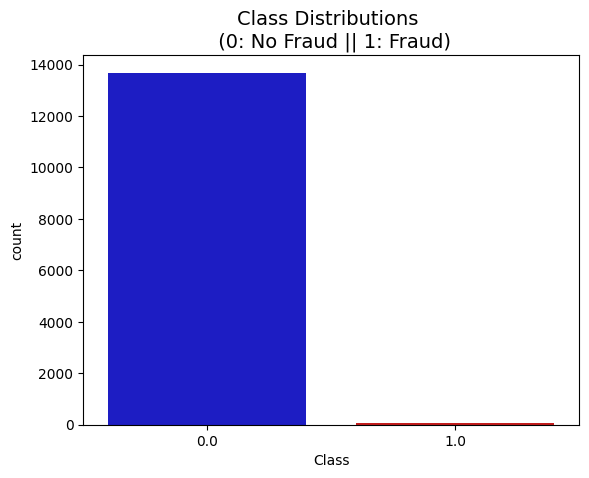

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

#Preprocessing the data
Robust Scaler scale features using statistics that are robust to outliers. The Robust Scaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers.

$$\frac{\text{x}-\text{Q1(x)}}{\text{Q3(x)}-\text{Q1(x)}}$$

In [ ]:
scaler=RobustScaler()
df['Amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [ ]:
df['Amount']

0        2.901494
1       -0.279498
2        7.860143
3        2.336003
4        1.177528
           ...   
13734    6.387963
13735    0.653821
13736    3.432778
13737    0.398571
13738   -0.186404
Name: Amount, Length: 13739, dtype: float64

In [ ]:
df['Time']=scaler.fit_transform(df.Time.values.reshape(-1,1))

In [ ]:
df['Time']

0       -0.656242
1       -0.656242
2       -0.656167
3       -0.656167
4       -0.656092
           ...   
13734    1.170660
13735    1.170660
13736    1.170960
13737    1.170960
13738    1.170960
Name: Time, Length: 13739, dtype: float64

#Splitting the dataframe
Before proceeding with any Sampling technique we have to separate the orginal dataframe.
Why? for testing purposes, we want to test our models on the original testing set not on the testing set created by either of these techniques.
The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [ ]:
strat=StratifiedShuffleSplit(n_splits=1,test_size=0.2,train_size=0.8,random_state=1)

In [ ]:
x=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
for train,test in strat.split(x,y):
  train_df=df.iloc[train]
  test_df=df.iloc[test]

In [ ]:
train_df.shape,test_df.shape

((10991, 32), (2748, 32))

In [ ]:
x_train=train_df.drop('Class',axis=1)
y_train=train_df['Class']
x_test=test_df.drop('Class',axis=1)
y_test=test_df['Class']

#Model Training

In [ ]:
model=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred=model.predict(x_test)

#Model Evaluation
A robust evaluation is required to measure the performance of a fraud detection model.

1. False Positives: A false positive is an outcome where the model incorrectly predicts the positive class.
2. False Negatives: A false negative is an outcome where the model incorrectly predicts the negative class.
3. Precision: Precision talks about how precise/accurate the model is i.e. out of those predicted positives, how many of them are actual positive. Precision is a good measure to determine, when the costs of False Positives is high. For instance, here, a false positive means that a transaction is that is non- fraudulent has been identified as fraudulent. This can happen if the precision is not high for the fraud detection model.
4. Recall: Recall calculates how many of the Actual Positives our model captures through labeling it as Positive (True Positive). If a fraudulent transaction is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.
5. F1 Score: F1 Score is used to seek a balance between Precision and Recall.


In [ ]:
accuracy_score(y_test,y_pred)

0.9989082969432315

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2737
         1.0       1.00      0.73      0.84        11

    accuracy                           1.00      2748
   macro avg       1.00      0.86      0.92      2748
weighted avg       1.00      1.00      1.00      2748



In [ ]:
model.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=176412804)

#Feature Importance
In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables.

In [ ]:
model.feature_importances_

array([0.00336767, 0.00758432, 0.00637262, 0.01313811, 0.06315983,
       0.16923719, 0.03674429, 0.04337293, 0.00559848, 0.001229  ,
       0.05445374, 0.01560504, 0.07612684, 0.18068123, 0.00042668,
       0.18369278, 0.00504663, 0.00127271, 0.01607826, 0.01317559,
       0.0172603 , 0.01197863, 0.01303677, 0.0081064 , 0.00211606,
       0.00829006, 0.0018262 , 0.01606879, 0.00223095, 0.01290231,
       0.0098196 ])

In [ ]:
x_train.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')

In [ ]:
Important_Feature=pd.Series(model.feature_importances_,index=x_train.columns)

In [ ]:
Important_Feature.sort_values(ascending=False,inplace=True)

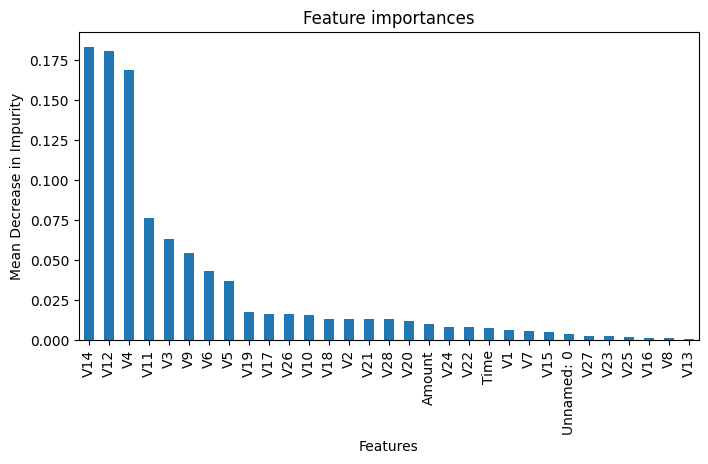

In [ ]:
fig = plt.figure(figsize=(8,4), dpi=100)
Important_Feature.plot.bar()
plt.title("Feature importances")
plt.xlabel("Features")
plt.ylabel("Mean Decrease in Impurity")
plt.show()

#Modifying Dataset
Choose only 20 top contributing feature


In [ ]:
modified_df=df.drop(['V22','Time','V1','V7','V15','Unnamed: 0','V27','V23','V25','V16','V8','V13'],axis=1)

In [ ]:
modified_df.shape

(13739, 20)

In [ ]:
modified_df.isnull().sum()

V2        0
V3        0
V4        0
V5        0
V6        0
V9        0
V10       0
V11       0
V12       0
V14       0
V17       0
V18       0
V19       0
V20       0
V21       0
V24       0
V26       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
modified_df.head(5)

,V2,V3,V4,V5,V6,V9,V10,V11,V12,V14,V17,V18,V19,V20,V21,V24,V26,V28,Amount,Class
0,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.363787,0.090794,-0.551600,-0.617801,-0.311169,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,-0.189115,-0.021053,2.901494,0.0
1,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.255425,-0.166974,1.612727,1.065235,-0.143772,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,0.125895,0.014724,-0.279498,0.0
2,-1.340163,1.773209,0.379780,-0.503198,1.800499,-1.514654,0.207643,0.624501,0.066084,-0.165946,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.139097,-0.059752,7.860143,0.0
3,-0.185226,1.792993,-0.863291,-0.010309,1.247203,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,-0.221929,0.061458,2.336003,0.0
4,0.877737,1.548718,0.403034,-0.407193,0.095921,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.502292,0.215153,1.177528,0.0


In [ ]:
modified_x=modified_df.drop('Class',axis=1)
modified_y=modified_df['Class']

In [ ]:
for train_data, test_data in strat.split(modified_x, modified_y):
    modified_train_df = df.iloc[train_data]
    modified_test_df = df.iloc[test_data]

In [ ]:
modified_x_train=modified_train_df.drop('Class',axis=1)
modified_x_test=modified_test_df.drop('Class',axis=1)
modified_y_train=modified_train_df['Class']
modified_y_test=modified_test_df['Class']

#Modified Model Training

In [ ]:
model2=RandomForestClassifier(n_estimators=100,criterion='entropy')

In [ ]:
model2.fit(modified_x_train,modified_y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred2=model2.predict(modified_x_test)

#Modified Model Evaluation

In [ ]:
accuracy_score(modified_y_test,y_pred2)

0.9992721979621543

In [ ]:
print(classification_report(modified_y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2737
         1.0       1.00      0.82      0.90        11

    accuracy                           1.00      2748
   macro avg       1.00      0.91      0.95      2748
weighted avg       1.00      1.00      1.00      2748



#Results
After choosing the important parameter accuracy reaches to 99.92%